In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [126]:
# df = pd.read_csv('datasets/Teconer_2018_Jan.csv').dropna()
df = pd.read_csv('datasets/Teconer_2018_Jan_light_1M.csv').dropna()

# sort df by AbsoluteTime field
df.sort_values(by=['AbsoluteTime'], inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])

data_X = df[['AbsoluteTime','Latitude', 'Longitude','Tsurf', 'Ta','Hours','Speed']]
data_y = df['Friction']

# data_X = df[['Latitude', 'Longitude','Tsurf', 'Ta','Speed']]
# data_y = df['Friction']

In [128]:
df = pd.read_csv('datasets/bike_hour.csv')
df = df.reset_index().rename(columns={'index': 'index_col'})
data_X = df[['index_col','workingday','mnth','holiday','weathersit','season','atemp','temp','hum','windspeed']].to_numpy()
# data_X = df[['atemp','temp','hum','windspeed']].to_numpy()
data_y = df['cnt'].to_numpy()

In [3]:
# visualize the statistics of the features and target variable
print(data_X.describe())
print(data_y.describe())

# visualize the correlation between the features and the target variable
correlation = df[['Latitude', 'Longitude','Tsurf', 'Ta','Speed','Friction']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.distplot(data_y)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

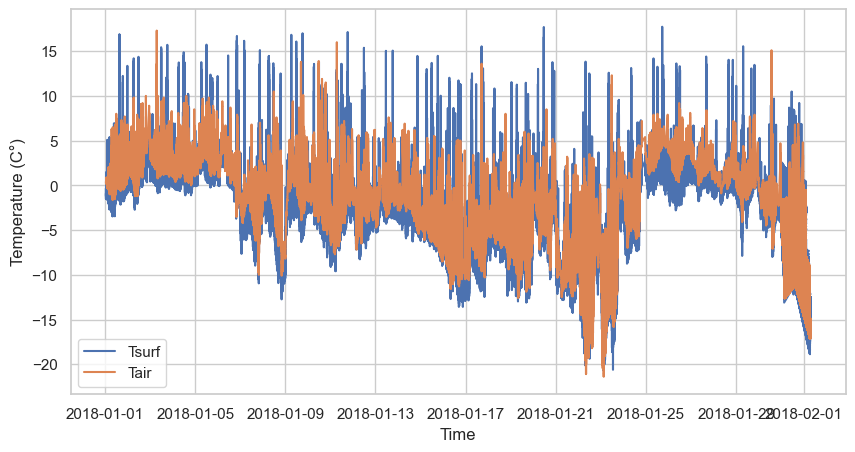

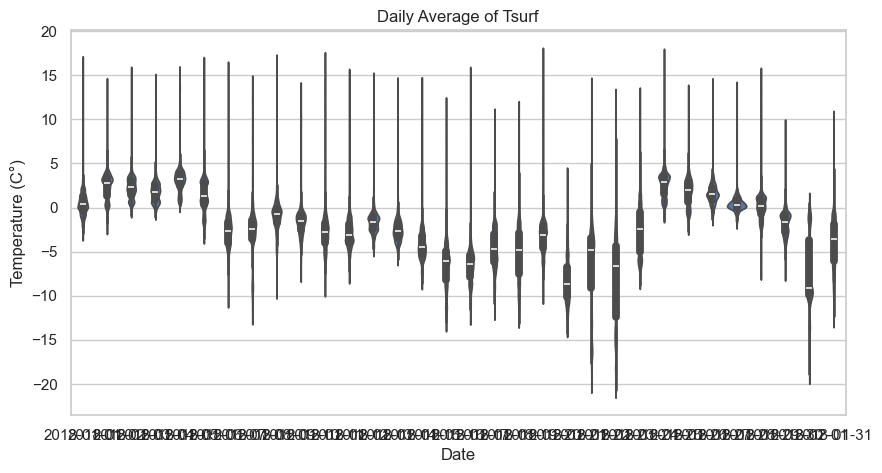

In [117]:
# plot th hourly average of the temperature of the surface and the air with respect to the time
plt.figure(figsize=(10, 5))


plt.plot(df['DateTime'], df['Tsurf'], label='Tsurf')
plt.plot(df['DateTime'], df['Ta'], label='Ta')
plt.xlabel('Time')
plt.ylabel('Temperature (C\N{DEGREE SIGN})')
plt.legend(['Tsurf', 'Tair'])
plt.show()


# plot the daily average of the temperature with respect to the time in a box plot
plt.figure(figsize=(10, 5))
df['Date'] = df['DateTime'].dt.date
sns.violinplot(x='Date', y='Tsurf', data=df)
plt.xlabel('Date')
plt.ylabel('Temperature (C\N{DEGREE SIGN})')
plt.title('Daily Average of Tsurf')
plt.show()





In [134]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train a model to predict friction
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, random_state=0, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=100, verbose=False, solver='adam', alpha=0.001, tol=0.01, activation='relu')

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, max_depth=5)


model.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))



Accuracy on training set: 0.37


In [130]:
# plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(model.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')


AttributeError: 'RandomForestRegressor' object has no attribute 'loss_curve_'

<Figure size 1000x500 with 0 Axes>

In [136]:
# calculate the MAE and RMSE of the model on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# pring mean and std of the y values
print("Mean of y values: ", np.mean(y_test))
print("Std of y values: ", np.std(y_test))



MAE:  107.42793478066585
RMSE:  145.57638912089178
Mean of y values:  190.26208285385502
Std of y values:  182.67212687923853


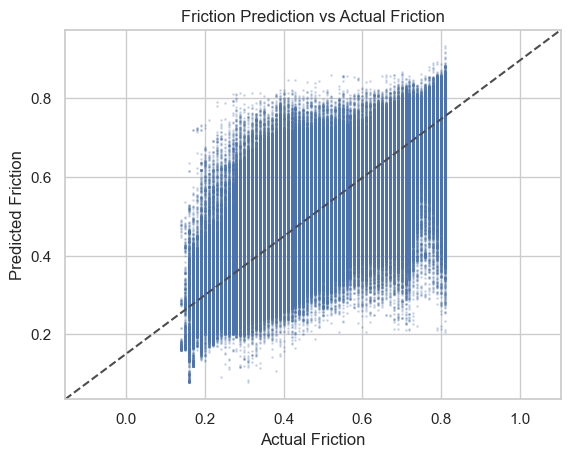

In [122]:
# plot the friction prediction vs the actual friction

y_pred = mlp.predict(X_test)
plt.scatter(y_test, y_pred, s=1, alpha=0.2)
plt.xlabel('Actual Friction')
plt.ylabel('Predicted Friction')
plt.title('Friction Prediction vs Actual Friction')
# make axis equal
plt.axis('equal')
# add a diagonal line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")

plt.show()


In [153]:
%matplotlib qt

df = pd.read_csv('datasets/Teconer_2018_Jan_light_100K.csv').dropna()

# sort df by AbsoluteTime field
df.sort_values(by=['AbsoluteTime'], inplace=True)

# convert DateTime to a datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])


# divide the data into chunks (one chunk per week) according to DateTime and plot the friction vs lat and long (one subplot per chunk)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# window_size = pd.Timedelta(hours=1)
# window_size = pd.Timedelta(days=1)
window_size = pd.Timedelta(weeks=1)

lat_bound = [60.18, 60.24]
long_bound = [24.91, 24.97]

df_local = df[(df['Latitude'] >= lat_bound[0]) & (df['Latitude'] <= lat_bound[1])]
df_local = df_local[(df_local['Longitude'] >= long_bound[0]) & (df_local['Longitude'] <= long_bound[1])]

start = df['DateTime'].iloc[0]
for i in range(2):
    for j in range(2):
        # k = i*2+j
        
        end = start + window_size
        mask = (df['DateTime'] > start) & (df['DateTime'] <= end)
        df_chunk = df_local.loc[mask]
        ax[i, j].scatter(df_chunk['Longitude'], df_chunk['Latitude'], c=df_chunk['Friction'], cmap='viridis', s=1, alpha=0.8)
        ax[i, j].set_title('Week ' + str(i*2+j+1) + '\n ('+ str(start.date()) + ' to ' + str(end.date()) + ')')
        # prting the duration of the chunk on the plot
        # ax[i, j].text(0.5, 0.9, , fontsize=12, ha='center', transform=ax[i, j].transAxes)
        ax[i, j].set_xlabel('Longitude')
        ax[i, j].set_ylabel('Latitude')
        # ax[i, j].axis('equal')
        ax[i, j].set_xlim(long_bound)
        ax[i, j].set_ylim(lat_bound)

        # make axes equal
        ax[i, j].set_aspect('equal')
        
        # make all the axis labels and ticks gray
        ax[i, j].xaxis.label.set_color('gray')
        ax[i, j].yaxis.label.set_color('gray')
        ax[i, j].tick_params(axis='x', colors='gray')
        ax[i, j].tick_params(axis='y', colors='gray')


        # set grids off
        ax[i, j].grid(False)
        # make colorbar for each subplot
        sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=.1, vmax=.9))
        sm._A = []
        cbar = fig.colorbar(sm, ax=ax[i, j])
        cbar.set_label('Friction')

        start = end


# tight layout
# plt.tight_layout()
        
# save svg
plt.savefig('friction_map.svg')
  
        



In [154]:
np.unique([max(int(1.15**j), 10) for j in range(1, 50+1)])

array([  10,   12,   14,   16,   18,   21,   24,   28,   32,   37,   43,
         50,   57,   66,   76,   87,  100,  115,  133,  153,  176,  202,
        232,  267,  308,  354,  407,  468,  538,  619,  712,  819,  942,
       1083])

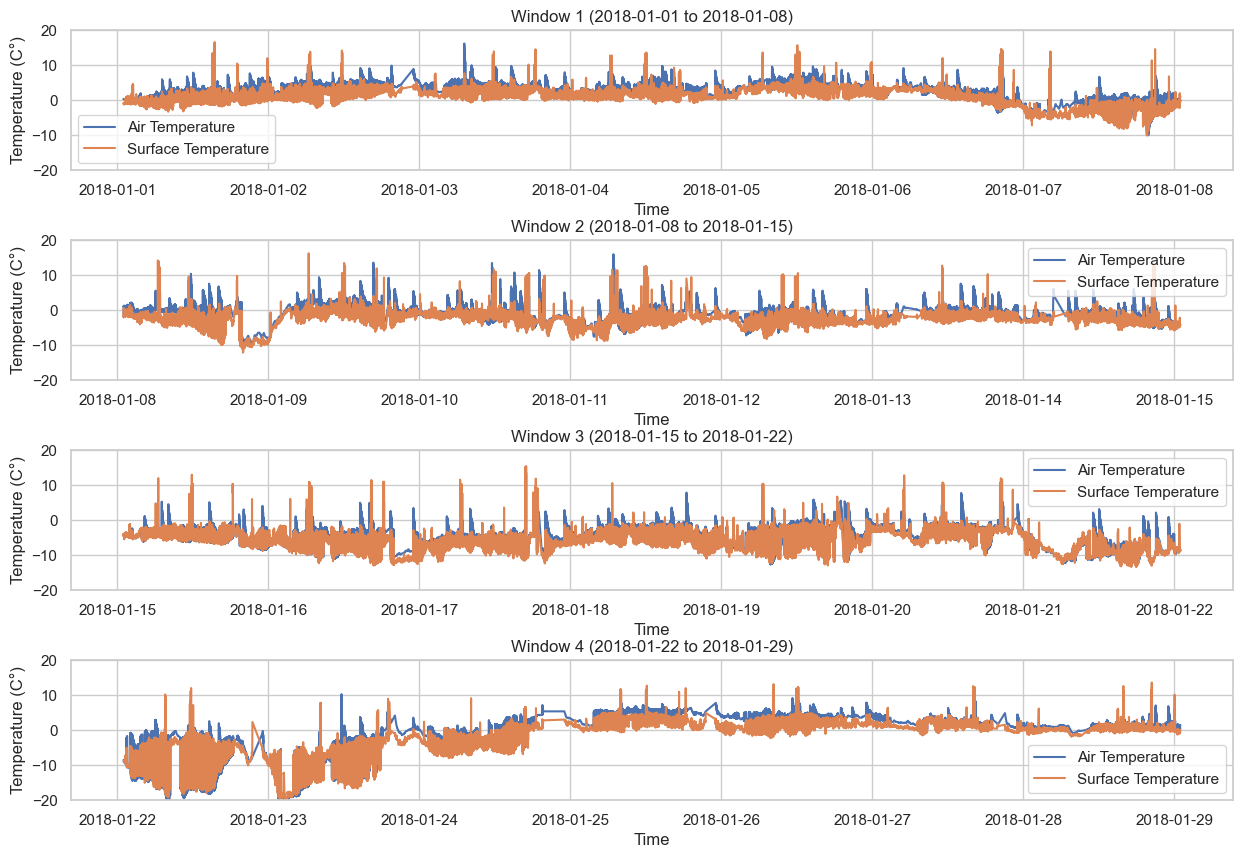

In [148]:
# plot the average atemperature and surface temperature per week
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(4):
    start = df['DateTime'].iloc[0] + pd.Timedelta(weeks=i)
    end = start + window_size
    mask = (df['DateTime'] > start) & (df['DateTime'] <= end)
    df_chunk = df.loc[mask]
    ax[i].plot(df_chunk['DateTime'], df_chunk['Ta'], label='Air Temperature')
    ax[i].plot(df_chunk['DateTime'], df_chunk['Tsurf'], label='Surface Temperature')
    ax[i].set_title('Window ' + str(i+1) + ' ('+ str(start.date()) + ' to ' + str(end.date()) + ')')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Temperature (C\N{DEGREE SIGN})')
    ax[i].legend()
    ax[i].grid(True)

    # make ylimits the same for all subplots
    ax[i].set_ylim([-20, 20])
